<a href="https://colab.research.google.com/github/Learnheart/gis_group_d/blob/main/model_building/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ABOUT DATASET


Attribute Information:
- holiday: Categorical US National holidays plus regional holiday, Minnesota
- State Fair
- temp: Numeric Average temp in kelvin
- rain_1h: Numeric Amount in mm of rain that occurred in the hour
- snow_1h: Numeric Amount in mm of snow that occurred in the hour
- clouds_all: Numeric Percentage of cloud cover
- weather_main: Categorical Short textual description of the current weather
- weather_description: Categorical Longer textual description of the current weather
- date_time: DateTime Hour of the data collected in local CST time
- traffic_volume: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [23]:
from google.colab import files
import pandas as pd

# Upload the CSV file
#uploaded = files.upload()

# Read the uploaded CSV file
data = pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv")  # Use the name of your uploaded file
#data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GIS/Metro_Interstate_Traffic_Volume.csv")
data.head()


,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [24]:
data.shape

(48204, 9)

In [25]:
data.columns

Index(['traffic_volume', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00


In [28]:
data.dtypes

,0
traffic_volume,int64
holiday,object
temp,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64
weather_main,object
weather_description,object
date_time,object


In [29]:
data['holiday'] = data['holiday'].fillna('No')
data.count()

,0
traffic_volume,48204
holiday,48204
temp,48204
rain_1h,48204
snow_1h,48204
clouds_all,48204
weather_main,48204
weather_description,48204
date_time,48204


In [30]:
print("max date :" + data.date_time.max())
print("min date :" + data.date_time.min())

max date :31-12-2017 23:00
min date :01-01-2013 00:00


#EDA

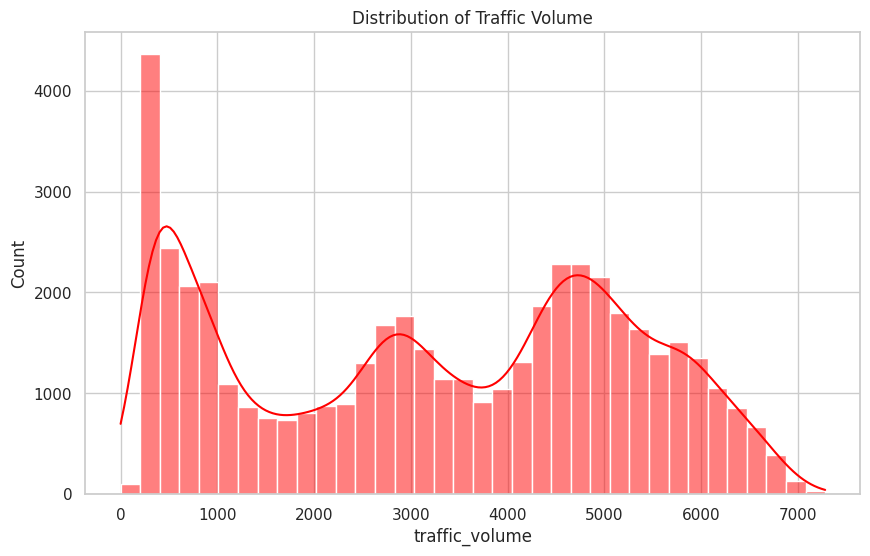

In [31]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
sns.set(style="whitegrid")

# Plotting the distribution of traffic_volume
plt.figure(figsize=(10,6))
sns.histplot(data['traffic_volume'], color='red', kde=True) # Changed df to data
plt.title('Distribution of Traffic Volume')
plt.show()

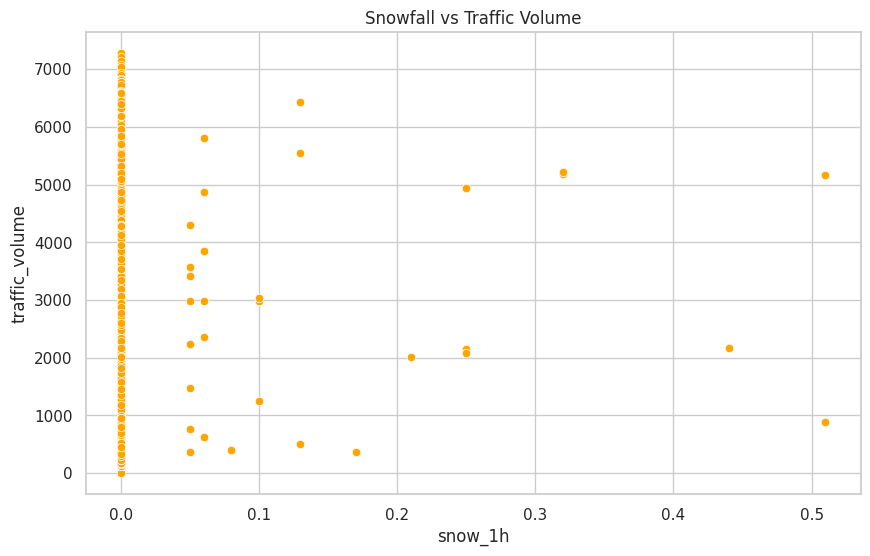

In [32]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
sns.set(style="whitegrid")

# Plotting the relationship between snow_1h and traffic_volume
plt.figure(figsize=(10,6))
sns.scatterplot(x='snow_1h', y='traffic_volume', data=data, color='orange') # Changed df to data
plt.title('Snowfall vs Traffic Volume')
plt.show()

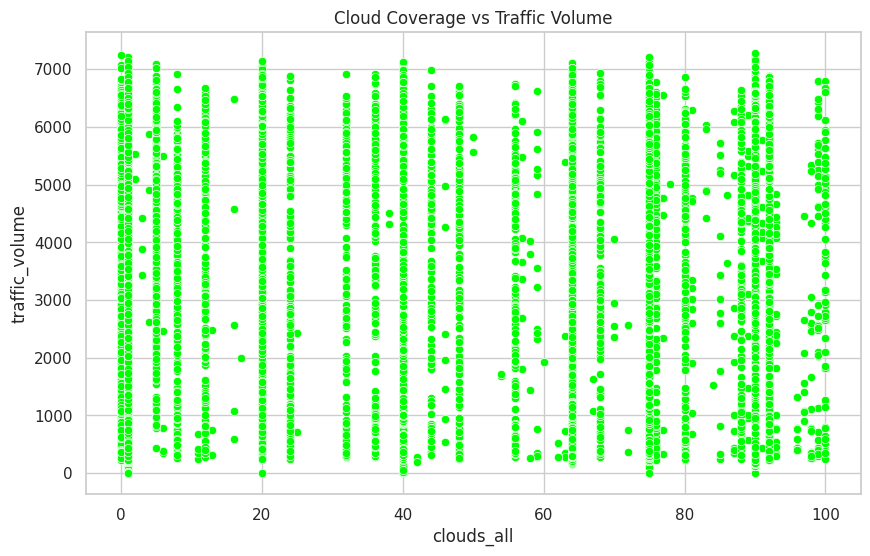

In [33]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
sns.set(style="whitegrid")

# Plotting the relationship between clouds_all and traffic_volume
plt.figure(figsize=(10,6))
sns.scatterplot(x='clouds_all', y='traffic_volume', data=data, color='lime') # Changed df to data
plt.title('Cloud Coverage vs Traffic Volume')
plt.show()

<ipython-input-34-e28aa0872bc0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='weather_main', data=data, palette='viridis') # Changed df to data


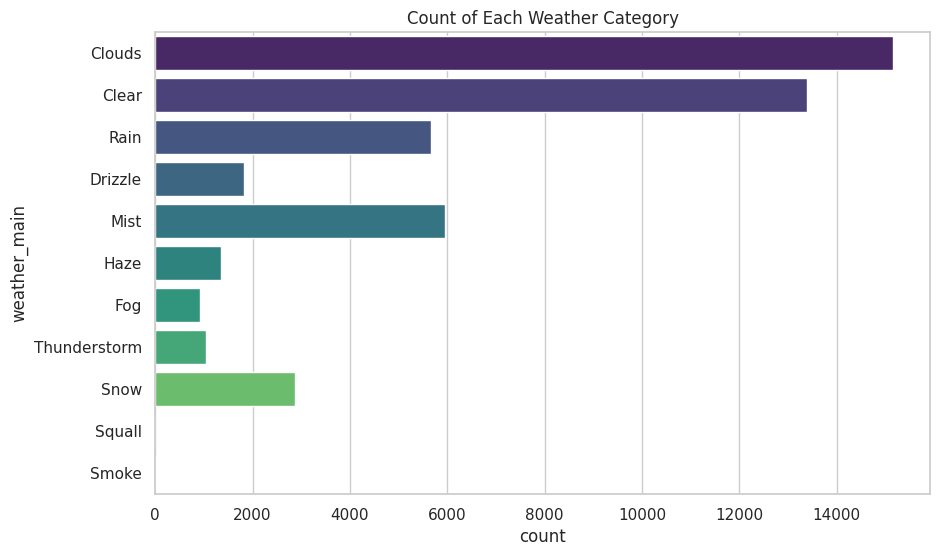

In [34]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
sns.set(style="whitegrid")

# Plotting the count of each weather_main category
plt.figure(figsize=(10,6))
sns.countplot(y='weather_main', data=data, palette='viridis') # Changed df to data
plt.title('Count of Each Weather Category')
plt.show()

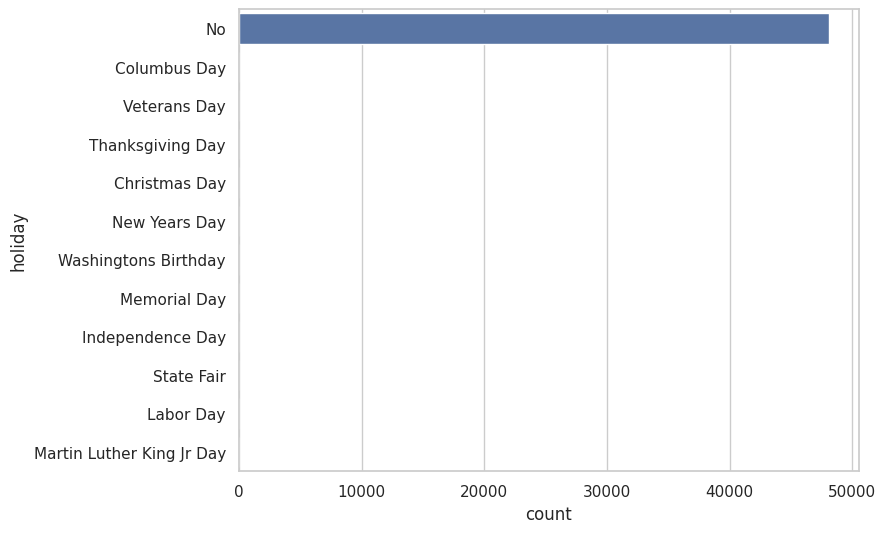

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = data)
plt.show()

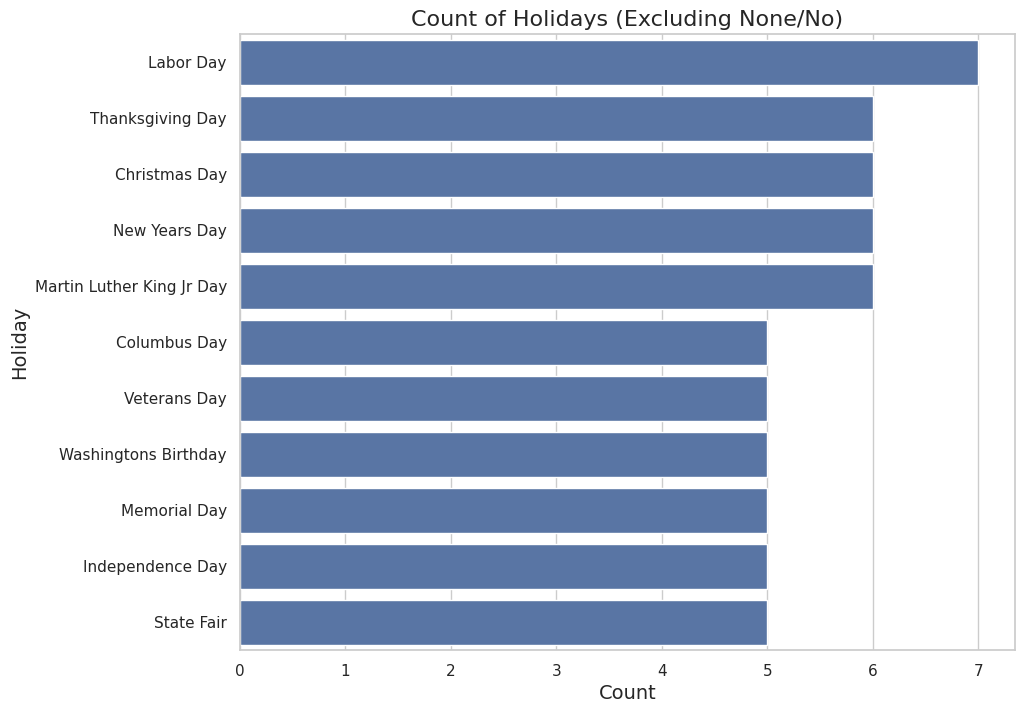

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your DataFrame with the column `holiday`.
# Filter out rows where 'holiday' is 'None', 'No', or NaN
holidays = data.loc[~data['holiday'].isin(['None', 'No']) & data['holiday'].notna()]

plt.figure(figsize=(10, 8))  # Set figure size
sns.countplot(y='holiday', data=holidays, order=holidays['holiday'].value_counts().index)  # Sort by frequency
plt.title('Count of Holidays (Excluding None/No)', fontsize=16)  # Add title
plt.xlabel('Count', fontsize=14)  # Label for x-axis
plt.ylabel('Holiday', fontsize=14)  # Label for y-axis
plt.show()


<Axes: xlabel='count', ylabel='weather_main'>

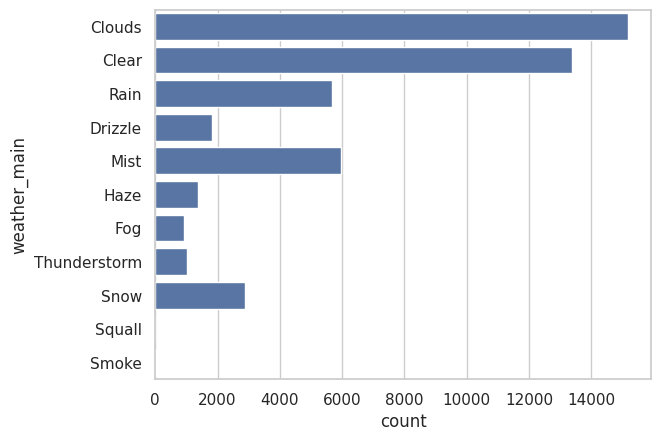

In [37]:
sns.countplot(y='weather_main', data=data)

<Axes: xlabel='traffic_volume', ylabel='temp'>

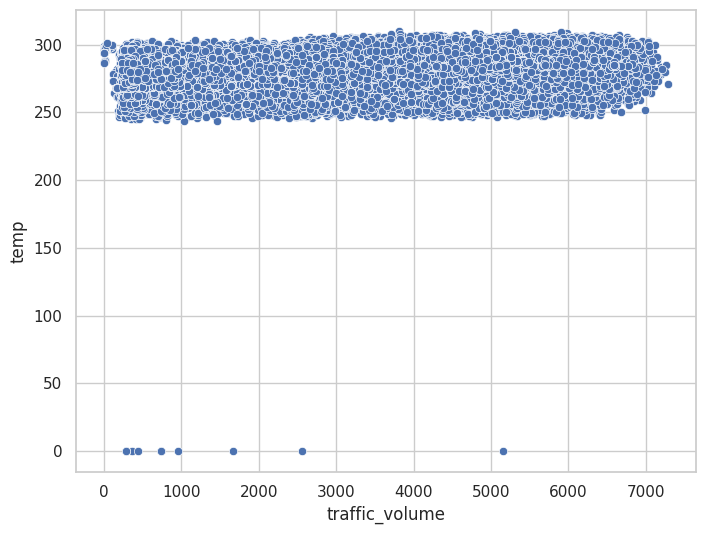

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='traffic_volume', y='temp', data = data.loc[data.temp>-50])

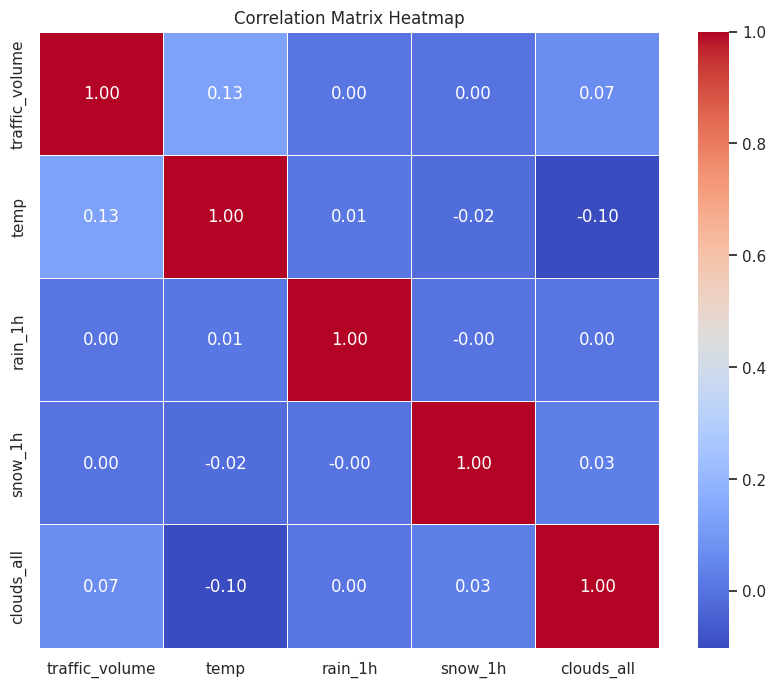

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Make sure pandas is imported

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()

# Visualization

Q1. Top 5 weather conditions that lead to the highest traffic volume

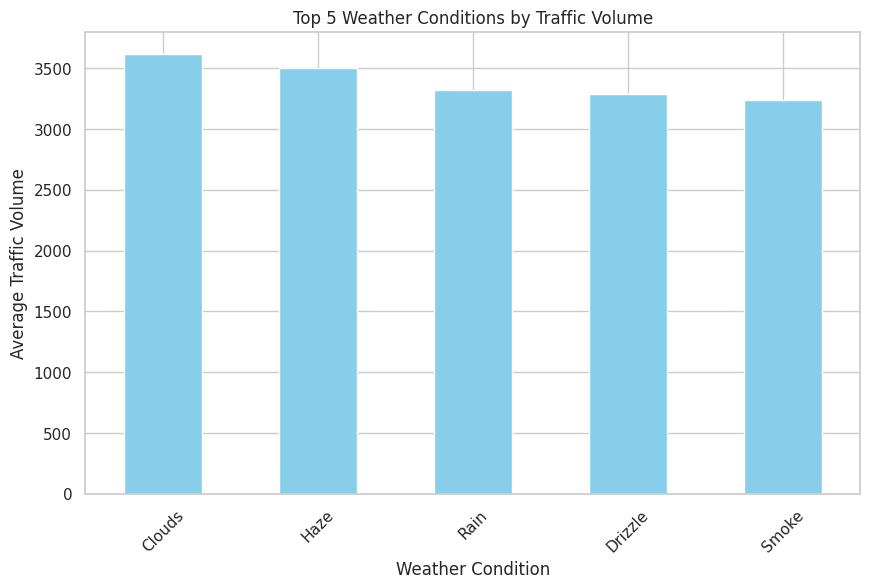

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv")  # Use the name of your uploaded file

# Group the data by weather_main and calculate the mean traffic volume
grouped_data = data.groupby('weather_main')['traffic_volume'].mean().sort_values(ascending=False)

# Select the top 5 weather conditions
top_5_weather = grouped_data.head(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_5_weather.plot(kind='bar', color='skyblue')
plt.title('Top 5 Weather Conditions by Traffic Volume')
plt.xlabel('Weather Condition')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.show()

Q2. The distribution of traffic volume throughout the day

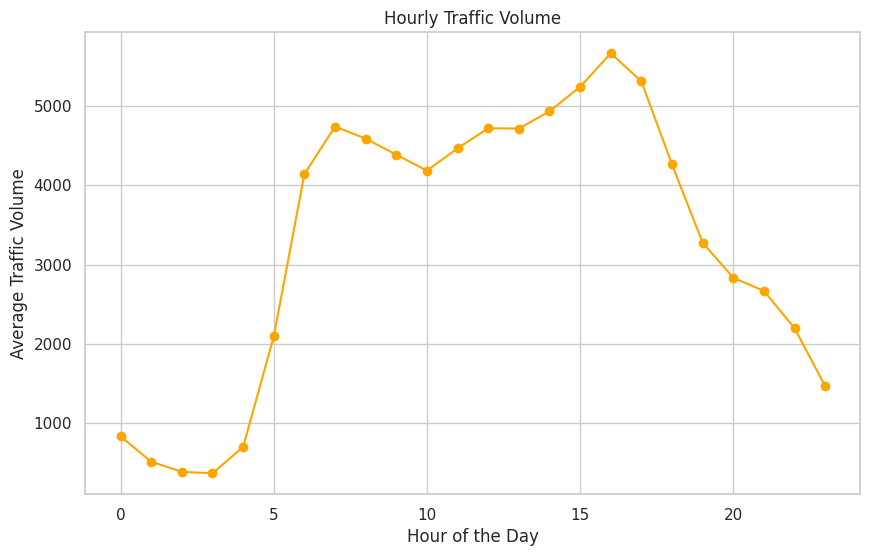

In [41]:
# lấy hour từ date_time
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M', errors='coerce')  # Thống nhất format
data['hour'] = data['date_time'].dt.hour

# Group the data by hour and calculate the mean traffic volume
hourly_traffic = data.groupby('hour')['traffic_volume'].mean()

# Create a line chart
plt.figure(figsize=(10, 6))
hourly_traffic.plot(kind='line', marker='o', color='orange')
plt.title('Hourly Traffic Volume')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.grid(True)
plt.show()

Q3. Traffic volume vary across different holidays

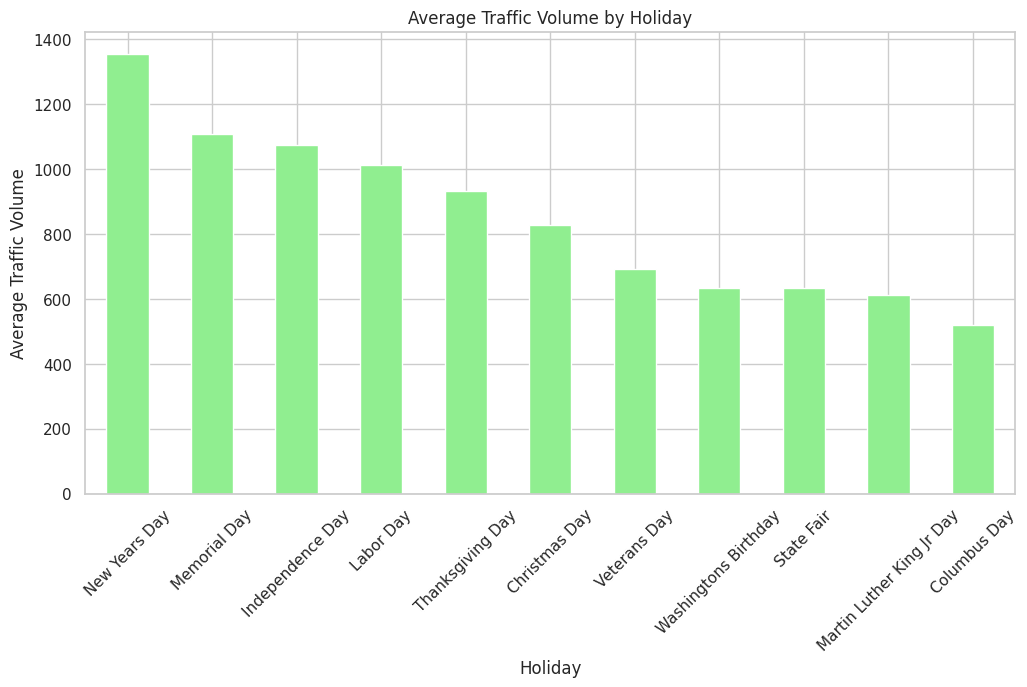

In [42]:
# Group the data by holiday and calculate the mean traffic volume
holiday_traffic = data.groupby('holiday')['traffic_volume'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
holiday_traffic.plot(kind='bar', color='lightgreen')
plt.title('Average Traffic Volume by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.show()